In [71]:
import sklearn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


In [72]:
#create a 1000 samples of r x and y
n_samples = 1000
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42
                    )
#create a 1000 samples of r x and y

In [73]:
#make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({'X1': X[:,0],
                        'X2': X[:,1],
                        'label': y})
circles.head(10) #look at the first ten samples

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


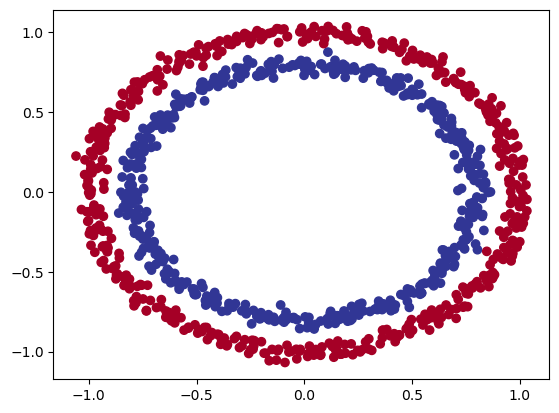

In [74]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c = y,
            cmap=plt.cm.RdYlBu) #red yellow blue

In [75]:
#check the shape of the data
X.shape, y.shape 

((1000, 2), (1000,))

In [76]:
#view the first sample of X and y
X_sample = X[0]
y_sample = y[0]
print(f"the first sample of X is {X_sample} and the first sample of y is {y_sample}")

the first sample of X is [0.75424625 0.23148074] and the first sample of y is 1


In [77]:
import torch
#X type is np array so it needs to be converted to torch

In [78]:
#X type is np array so it needs to be converted to torch

#convert np array into a tensor 

# due to np array being a 64 float we need to explicitly convert to float 32 that's why we use the torch.float
#it's very important to convert to a float 32 in order to avoid problems with pytorch and it's implementation
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [79]:
X.type(), X.dtype #making sure it's 32 float

('torch.FloatTensor', torch.float32)

In [80]:
#get the first five elements
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [81]:
#split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [82]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [83]:
from torch import nn
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [84]:
#construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #create two nn.linear layers cabable of handling our data and the data shape
        self.layer_1 = nn.Linear(in_features=2,
                                 out_features=5)
        self.layer_2 = nn.Linear(in_features=5,
                                 out_features=1)
        #define a forward method that outlines the forward pass
        def forward(self,x):
            return self.layer_2(self.layer_1(x)) #x goes into layer one and the output goes to the layer 2

model_0 = CircleModelV0()
model_0.to(device) #get our model into the gpu
#another way of implementing our model mentioned above
# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.two_linear_layers = nn.Sequential(
#             nn.Linear(in_features=2,out_features=5),
#             nn.Linear(in_features=5,out_features=1)
#         )
#         #define a forward method that outlines the forward pass
#         def forward(self,x):
#             return two_linear_layers(x)
# model_0 = CircleModelV0()
# model_0.to(device) #get our model into the gpu

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [85]:
#let's replicate our model using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [86]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='mps:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='mps:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='mps:0')),
             ('1.bias', tensor([-0.1213], device='mps:0'))])

In [87]:
#make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
    
print(f"first 10 predictions\n{untrained_preds[:10]}")
print(f"first 10 labels\n {y_test[:10]}")

first 10 predictions
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='mps:0')
first 10 labels
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [88]:
#loss function
#for Regression we want to use MAE (mean absolute error) or MSE (mean squared error).
#for classification we want to use binary cross entropy or categorical cross entropy(aka cross entropy).
#setup the loss function
#loss_fn = nn.BCELoss() also extists but requires inputs to have gone inside the sigmoid activation function prior to input
loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation build in


optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1
                            )

In [89]:
#calculate accuracy at the same time. Accuracy = true positive/(true positive+true negative) *100
#accuaracy means: out of 100 examples how many of them does our model get right?

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    #eq finds how many are the equals
    #item() because we want them as a single value in python
    acc = (correct/len(y_pred))*100
    return acc



In [90]:
#in order to convert our output which is in logits into probability prediction we use sigmoid for binary cross entropy
#and we use softmax for multiclass classification
model_0.eval()
with torch.inference_mode(): #remove the gradient tracking. we only want to evaluate
#view to first 5 of our data and pass it to the forward function
    y_logits = model_0(X_test.to(device))[:5]
y_logits 

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='mps:0')

In [91]:
#those results above are different than our test results
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [97]:
#use our sigmoid function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='mps:0')

In [98]:
# torch.round(y_pred_probs) #same format as our test label

In [99]:
#find the predicted label 
y_preds = torch.round(y_pred_probs)
#in full
y_preds_label = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
#check for equality
print(torch.eq(y_preds.squeeze(), y_preds_label.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True], device='mps:0')


tensor([0., 0., 1., 0., 1.], device='mps:0')

In [100]:
torch.manual_seed(42)

epochs = 1000

#get our data to gpu
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)


for epoch in range(epochs):
    model_0.train()
    
    #1. forward pass
    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits)) #logits -> predictions -> pred labels
    
    #2. calculate the loss and accuracy 
    loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expectes raw logits as input. if it was nn.BCELoss we would have to torch.sigmoid(y_logits)
                   y_train
                   )
    acc = accuracy_fn(y_true=y_train,
                           y_pred=y_preds)
    
    #3. optimizer 0 grad
    optimizer.zero_grad()
    
    #4. loss backward 
    loss.backward()
    
    #5. optimizer step ( gradient descent)
    optimizer.step()
    
    
    #testing 
    model_0.eval()
    with torch.inference_mode():
        #1. forward pass 
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        #2. calculate the test loss
        test_loss = loss_fn(test_logits, #nn.BCEWithLogitsLoss expectes raw logits as input. if it was nn.BCELoss we would have to torch.sigmoid(y_logits)
                   y_test
                   )
        test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)
        
    if epoch % 10 == 0:
        print(f"epoch number {epoch} | loss is {loss: .5f} | acc is {acc: .5f} ||| test loss is {test_loss: .5f} | test acc is {test_acc: .5f}")

epoch number 0 | loss is  0.69796 | acc is  51.87500 ||| test loss is  0.69440 | test acc is  58.00000
epoch number 10 | loss is  0.69590 | acc is  51.25000 ||| test loss is  0.69305 | test acc is  53.00000
epoch number 20 | loss is  0.69490 | acc is  51.62500 ||| test loss is  0.69254 | test acc is  49.50000
epoch number 30 | loss is  0.69435 | acc is  51.12500 ||| test loss is  0.69236 | test acc is  49.50000
epoch number 40 | loss is  0.69401 | acc is  50.87500 ||| test loss is  0.69232 | test acc is  51.00000
epoch number 50 | loss is  0.69378 | acc is  50.25000 ||| test loss is  0.69234 | test acc is  50.00000
epoch number 60 | loss is  0.69362 | acc is  50.00000 ||| test loss is  0.69239 | test acc is  51.50000
epoch number 70 | loss is  0.69351 | acc is  50.25000 ||| test loss is  0.69246 | test acc is  51.00000
epoch number 80 | loss is  0.69342 | acc is  49.87500 ||| test loss is  0.69254 | test acc is  50.00000
epoch number 90 | loss is  0.69336 | acc is  49.87500 ||| test lo

In [101]:
# make predictions and evaluate the model

import requests
from pathlib import Path
#download helper function from github repo if not available localy
if Path('helper_functions.py').is_file():
    print("already exists")
else:
    print("file doesnt exist and use requests.get(link)")

from helper_functions import plot_predictions, plot_decision_boundary

already exists


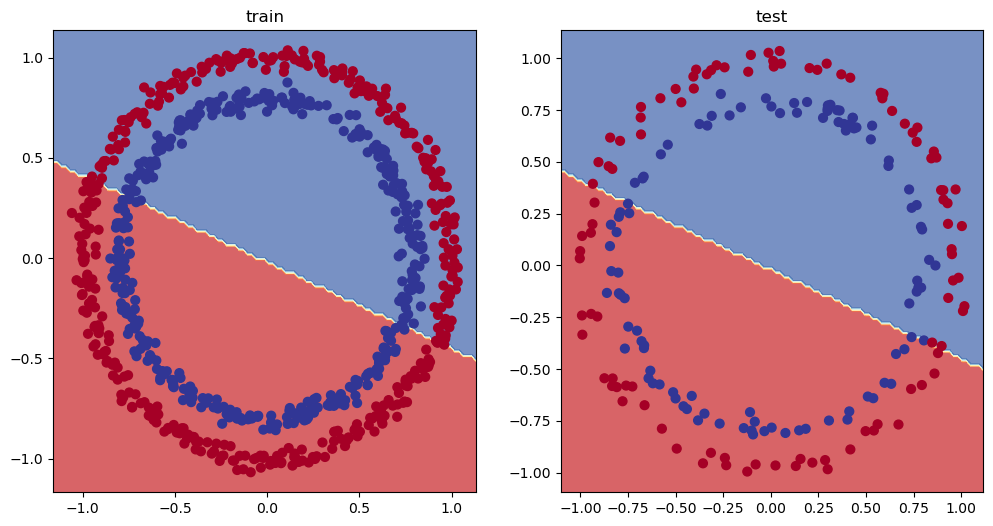

In [102]:
#plot decision boundary 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)#num of rows,num of columns,index
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)
#plot the test set
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

In [103]:
#create a new model in order to get better accuracy be playing with different hyperparameters

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x))) #this way of writing operations leverages speed up behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [104]:
#create a loss function
loss_fn = nn.BCEWithLogitsLoss()

#create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [105]:
torch.manual_seed(42)
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    #training mode
    model_1.train()
    
    #1. forward pass
    y_logits = model_1(X_train).squeeze() #remove the one dimension
    y_preds = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> predictions
    
    #2. Calculate the loss
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_preds)
     
     #3. optimizer zero grad
    optimizer.zero_grad()
    
    #4. loss backward
    loss.backward()
    
    #5. optimizer step
    optimizer.step()
    
    #test
    model_1.eval()
    with torch.inference_mode():
        #1. forward pass
        test_logits = model_1(X_test).squeeze() 
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        #2. calculate the loss
        test_loss = loss_fn(test_logits,y_test)
        acc = accuracy_fn(y_true=y_test,
                          y_pred=test_preds)
        
    
    if epoch % 100 == 0:
        print(f"epoch number {epoch} | loss is {loss: .5f} | acc is {acc: .5f} ||| test loss is {test_loss: .5f} | test acc is {test_acc: .5f}")

epoch number 0 | loss is  0.69396 | acc is  51.00000 ||| test loss is  0.69261 | test acc is  45.00000
epoch number 100 | loss is  0.69369 | acc is  50.00000 ||| test loss is  0.69269 | test acc is  45.00000
epoch number 200 | loss is  0.69351 | acc is  49.50000 ||| test loss is  0.69282 | test acc is  45.00000
epoch number 300 | loss is  0.69339 | acc is  49.00000 ||| test loss is  0.69295 | test acc is  45.00000
epoch number 400 | loss is  0.69329 | acc is  48.50000 ||| test loss is  0.69309 | test acc is  45.00000
epoch number 500 | loss is  0.69322 | acc is  49.50000 ||| test loss is  0.69322 | test acc is  45.00000
epoch number 600 | loss is  0.69317 | acc is  53.00000 ||| test loss is  0.69335 | test acc is  45.00000
epoch number 700 | loss is  0.69313 | acc is  50.50000 ||| test loss is  0.69347 | test acc is  45.00000
epoch number 800 | loss is  0.69309 | acc is  51.00000 ||| test loss is  0.69358 | test acc is  45.00000
epoch number 900 | loss is  0.69307 | acc is  47.50000 ||

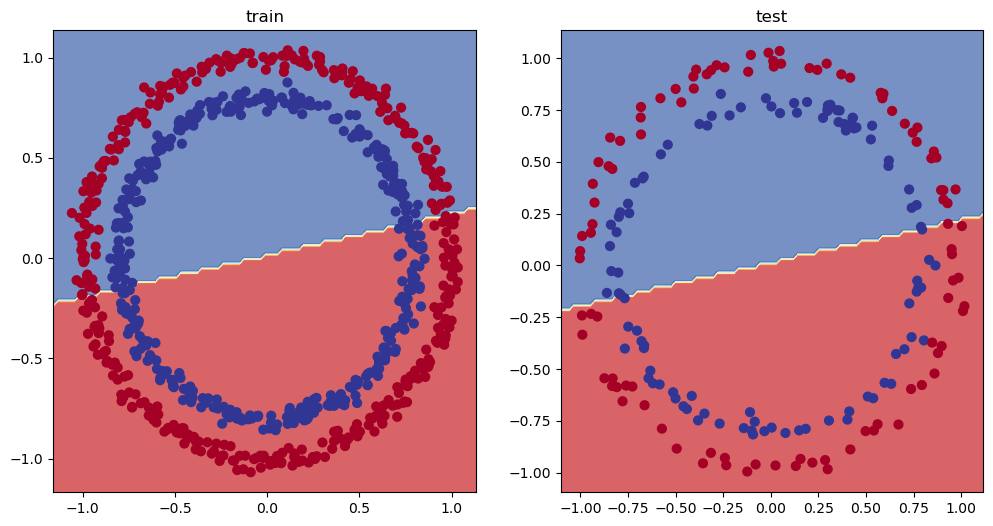

In [106]:
#plot decision boundary 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)#num of rows,num of columns,index
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
#plot the test set
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

In [107]:
#creat some data that -> straight line

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight*X_regression + bias
print(len(X_regression))

X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [108]:
#manually split into the training and the test set
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]
len(X_train_regression) , len(y_train_regression), len(X_test_regression), len(X_test_regression)

(80, 80, 20, 20)

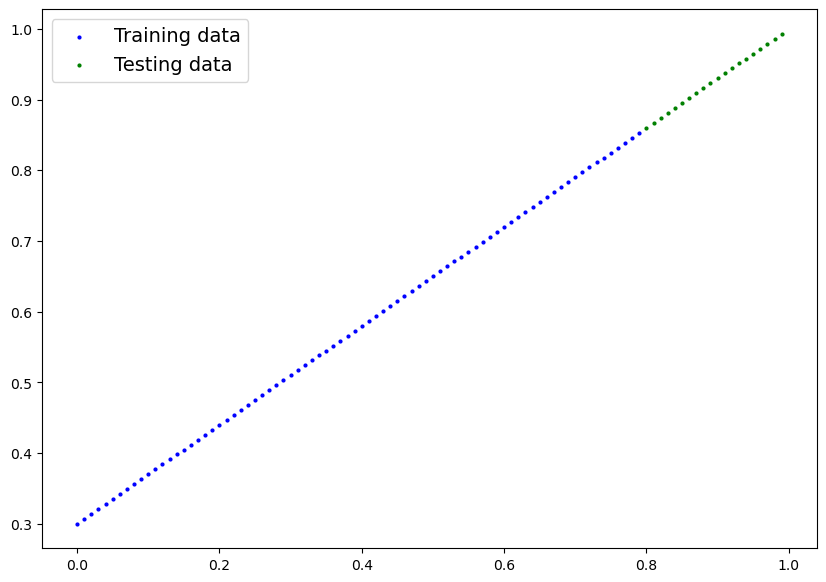

In [109]:
plot_predictions(train_data=X_train_regression,
                 train_labels= y_train_regression,
                 test_data=X_test_regression,
                 test_labels= y_test_regression)

In [110]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [111]:
#loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.01)


In [112]:
#train the model 
torch.manual_seed(42)
#set the number of epochs
epochs = 1000

#set the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

#training the model
for epoch in range(epochs):
    model_2.train() 
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    #testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
        
    if epoch % 100 == 0:
        print(f"epoch number {epoch} | loss is {loss: .5f} ||| test loss is {test_loss: .5f}")

/Users/antonis/miniforge3/envs/dfl_test/lib/python3.8/site-packages/torch/autograd/__init__.py:197: UserWarning: The operator 'aten::sgn.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1675757337498/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


epoch number 0 | loss is  0.75986 ||| test loss is  0.91103
epoch number 100 | loss is  0.02858 ||| test loss is  0.00081
epoch number 200 | loss is  0.02533 ||| test loss is  0.00209
epoch number 300 | loss is  0.02137 ||| test loss is  0.00305
epoch number 400 | loss is  0.01964 ||| test loss is  0.00341
epoch number 500 | loss is  0.01940 ||| test loss is  0.00387
epoch number 600 | loss is  0.01903 ||| test loss is  0.00379
epoch number 700 | loss is  0.01878 ||| test loss is  0.00381
epoch number 800 | loss is  0.01840 ||| test loss is  0.00329
epoch number 900 | loss is  0.01798 ||| test loss is  0.00360


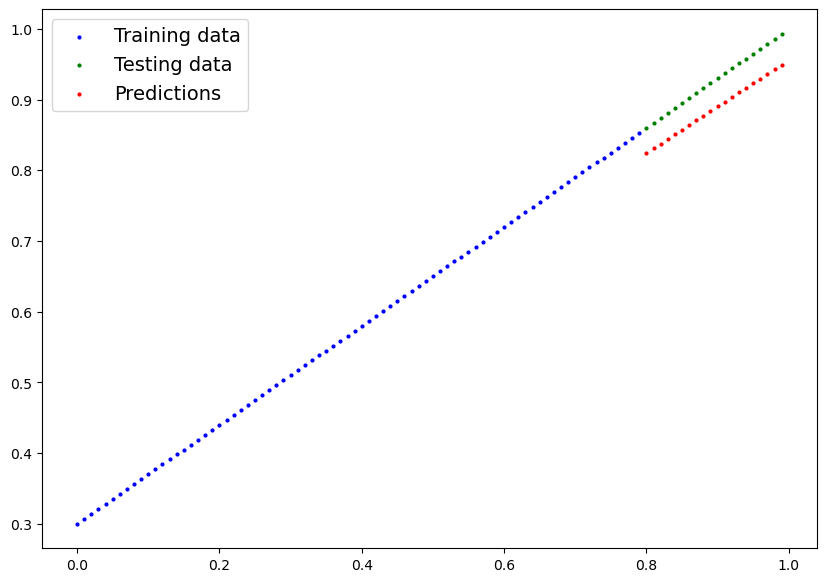

In [113]:
#turn on eval mode
model_2.eval()
#make predictions (inference)
with torch.inference_mode(): #needs .cpu() because matplolib uses numpy in the background
    y_preds = model_2(X_test_regression)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())


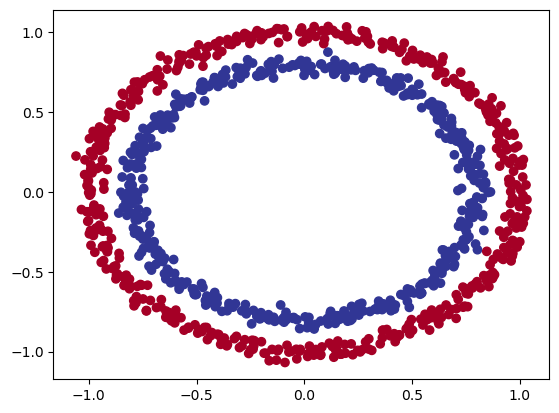

In [114]:
#recreate the non linear data
n_samples = 1000
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [115]:
import torch
from sklearn.model_selection import train_test_split

#turn data into tensors 
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
type(X)
#split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

In [116]:
#build a model with non linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2,10)
        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,1)
        self.relu = nn.ReLU()
    
    def forward(self,x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [155]:
device = 'cpu'
model_3 = CircleModelV2()
model_3.to(device)

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [156]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr= 0.1)

In [157]:
torch.manual_seed(42)
# if torch.backends.mps.is_available():
#     device = torch.device("mps")

#put all data on target device
X_train , y_train =  X_train.to(device), y_train.to(device)
X_test , y_test = X_test.to(device), y_test.to(device)
epochs = 10000
for epoch in range(epochs):
    #training
    model_3.train()
    
    #1. forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    #3. optimize the zero grad
    optimizer.zero_grad()
    
    #4. Loss backward
    loss.backward()
    
    # #5. step the optimzier
    #relu has no parameters to optimize
    
    optimizer.step()
    
    
    # #testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                                y_pred=test_pred)
        
        
    
    print(f"epoch number {epoch} | loss is {loss: .5f} | acc is {acc: .5f} ||| test loss is {test_loss: .5f} | test acc is {test_acc: .5f}")


epoch number 0 | loss is  0.69295 | acc is  50.00000 ||| test loss is  0.69319 | test acc is  50.00000
epoch number 1 | loss is  0.69289 | acc is  50.00000 ||| test loss is  0.69312 | test acc is  50.00000
epoch number 2 | loss is  0.69284 | acc is  50.00000 ||| test loss is  0.69305 | test acc is  50.00000
epoch number 3 | loss is  0.69279 | acc is  50.00000 ||| test loss is  0.69299 | test acc is  50.00000
epoch number 4 | loss is  0.69274 | acc is  50.00000 ||| test loss is  0.69292 | test acc is  50.00000
epoch number 5 | loss is  0.69268 | acc is  50.00000 ||| test loss is  0.69286 | test acc is  50.00000
epoch number 6 | loss is  0.69264 | acc is  50.00000 ||| test loss is  0.69280 | test acc is  50.00000
epoch number 7 | loss is  0.69259 | acc is  50.00000 ||| test loss is  0.69274 | test acc is  50.00000
epoch number 8 | loss is  0.69255 | acc is  50.00000 ||| test loss is  0.69269 | test acc is  50.00000
epoch number 9 | loss is  0.69251 | acc is  50.37500 ||| test loss is  0.

In [158]:
#make predicitons
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

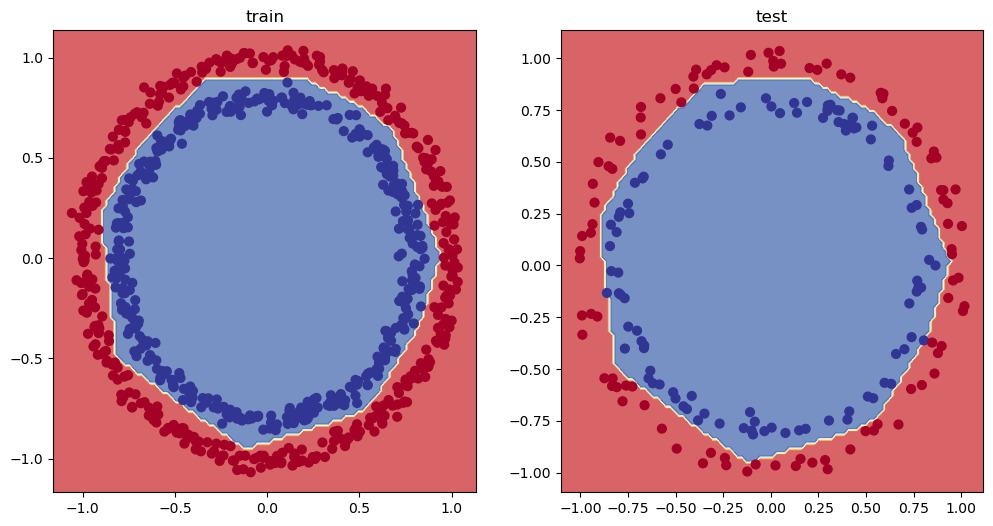

In [159]:
#plot decision boundary 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)#num of rows,num of columns,index
plt.title("train")
plot_decision_boundary(model_3,X_train,y_train)
#plot the test set
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)